In [1]:
from imcapt.model.imcapt import ImageCaption
from imcapt.data.vocabulary import Vocabulary
from imcapt.data.util import extract_vocabulary_from_karpathy_json
import torch

vocabulary = extract_vocabulary_from_karpathy_json("./datasets/captions/dataset_flickr30k.json")
model = ImageCaption.load_from_checkpoint("./checkpoints/pretrained_imcapt_flickr30_v1_e50.ckpt", vocabulary=vocabulary)
# model.load_state_dict(checkpoint)

d:\Projects\tth\tth_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Projects\tth\tth_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
model.setup('predict')

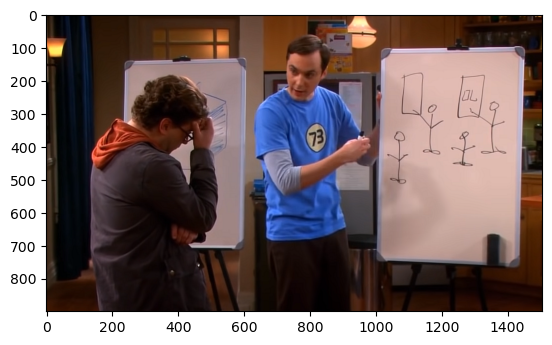

In [3]:
import torchvision
import matplotlib.pyplot as plt

image = torchvision.io.read_image("inference_test_images/image1.png", torchvision.io.ImageReadMode.RGB)
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
caption, alphas = model.forward(image.unsqueeze(0))[0]
caption

d:\Projects\tth\tth_env\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[1, 31, 32, 17, 31, 33, 34, 70, 132, 31, 65, 1418, 55, 7562, 2]

In [9]:
" ".join(map(vocabulary.get, caption))

'<START> a man in a blue shirt is holding a large pair of liquor <END>'

In [6]:
alphas.size()

torch.Size([15, 256])

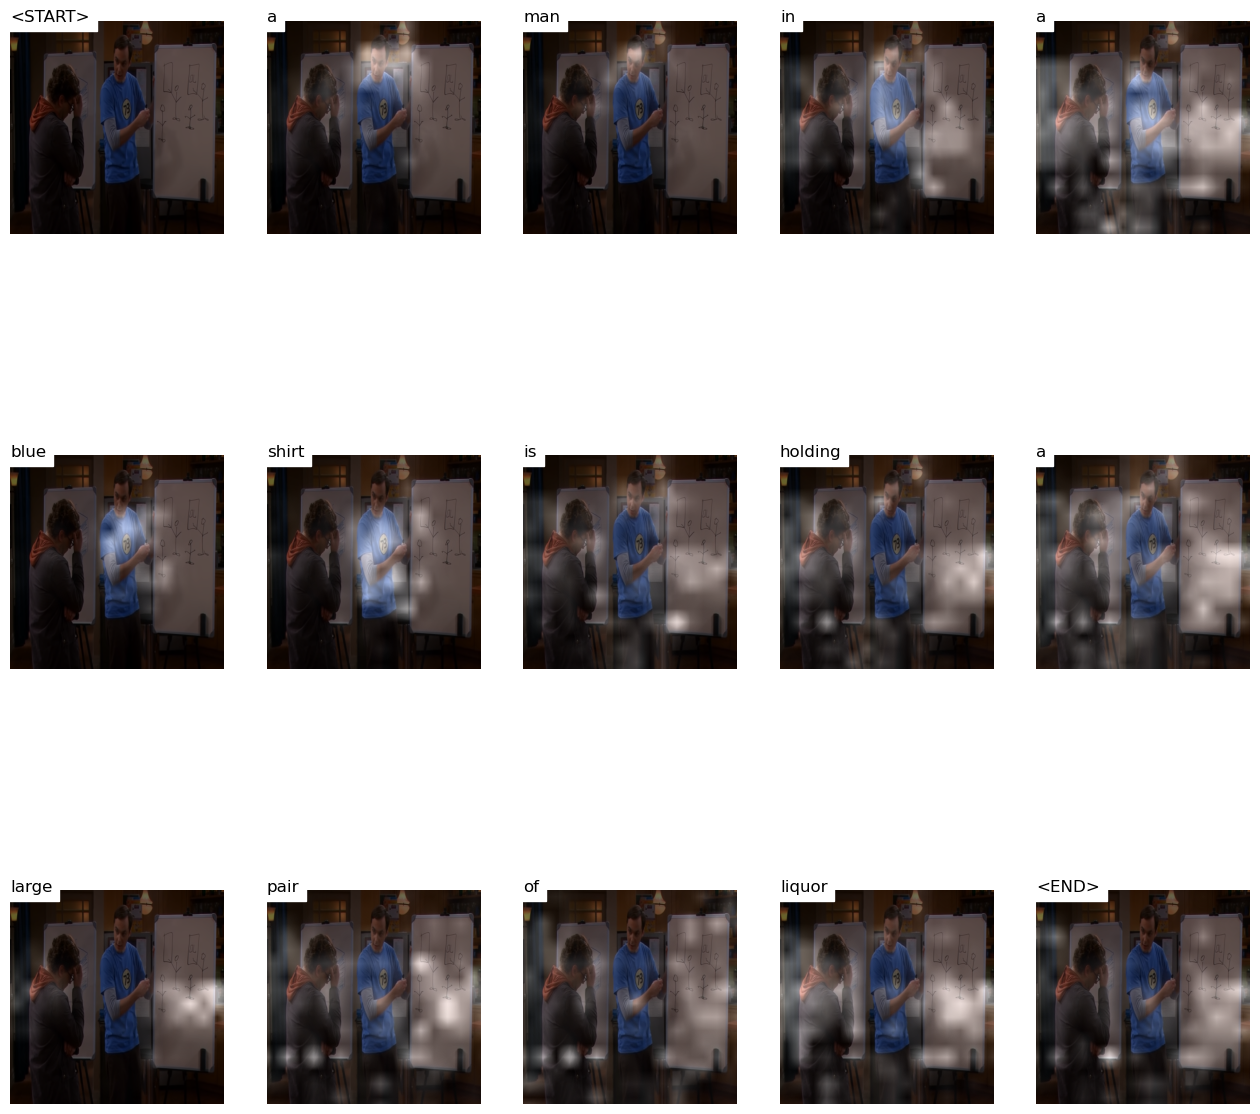

In [7]:
from skimage.transform import pyramid_expand, resize
from PIL import Image
import numpy as np
import matplotlib.cm as cm

pil_image = Image.fromarray(image.permute(1, 2, 0).numpy())
pil_image = pil_image.resize([16 * 24, 16 * 24])
plt.figure(figsize=(16, 16))
for t in range(len(caption)):
    plt.subplot(int(np.ceil(len(caption) / 5.)), 5, t + 1)
    plt.text(0, 1, vocabulary.get(caption[t]), color='black', backgroundcolor='white', fontsize=12)
    plt.imshow(pil_image)
    a = alphas[t].view(16, 16)
    # a = pyramid_expand(a.detach().numpy(), upscale=24, sigma=8)
    a = resize(a.detach().numpy(), [16 * 24, 16 * 24])
    plt.imshow(a, alpha=0.6)
    plt.set_cmap(cm.Greys_r)
    plt.axis('off')
plt.show()

In [8]:
print(*map(vocabulary.get, caption))

<START> a man in a blue shirt is holding a large pair of liquor <END>
